In [1]:
import pickle
from main import print_details, Shrink
import numpy as np
from tensorflow.keras.datasets import mnist,fashion_mnist
from skimage.util import view_as_windows
from pixelhop import Pixelhop
from skimage.measure import block_reduce
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
import warnings, gc
import time
import pickle
import seaborn as sns
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

In [2]:
build = pickle.load(open('/home/adityan/Studies/EE569_Spring2021/HW6/Channelwise-Saab-Transform/results/pixel_hop++_0_fashmnist_th20_01_build.pkl','rb'))

/home/adityan/.conda/envs/reorder/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:

# (x_train, y_train), (x_test,y_test) = mnist.load_data()

(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

x_train = np.asarray(x_train,dtype='float32')[:,:,:,np.newaxis]
x_test = np.asarray(x_test,dtype='float32')[:,:,:,np.newaxis]
y_train = np.asarray(y_train,dtype='int')
y_test = np.asarray(y_test,dtype='int')
x_train /= 255.0
x_test /= 255.0


4423680/4422102 [==============================] - 0s 0us/step


In [5]:
clf = build['classifier']

In [9]:
y_train_preds = clf.predict(build['train_feats'].squeeze())

In [10]:
accuracy_score(y_train_preds, y_train)

0.79775

Build pixel_hop_0_fashmnist_th20_01
Accuracy score:  0.8025
Confusion matrix:  [[800   5  11  44   3   0 199   0   1   1]
 [  4 938   1  24   3   0   4   0   3   0]
 [ 20   2 634   6 150   0 139   0  23   0]
 [ 60  40  15 822  53   4  47   0  10   0]
 [  9   9 169  43 711   0 130   0   6   0]
 [  3   0   0   0   0 908   1  39   5  14]
 [ 93   4 156  58  72   0 455   1  13   0]
 [  0   0   0   0   0  61   0 896   6  54]
 [ 11   2  14   3   8   4  25   4 931   1]
 [  0   0   0   0   0  23   0  60   2 930]]
Train feat shape:  (1, 1, 60000, 10)
Test feat shape:  (1, 1, 10000, 10)
Pixel hop time:  213.91775488853455
Feat time:  739.6976976394653
Classifier time:  65.09522771835327


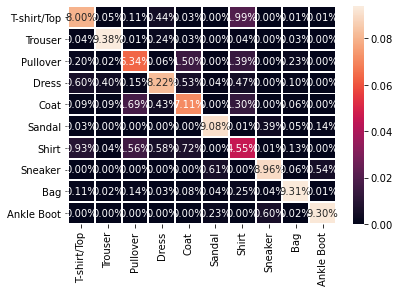

In [163]:
print_details(build)

[[0.08   0.0005 0.0011 0.0044 0.0003 0.     0.0199 0.     0.0001 0.0001]
 [0.0004 0.0938 0.0001 0.0024 0.0003 0.     0.0004 0.     0.0003 0.    ]
 [0.002  0.0002 0.0634 0.0006 0.015  0.     0.0139 0.     0.0023 0.    ]
 [0.006  0.004  0.0015 0.0822 0.0053 0.0004 0.0047 0.     0.001  0.    ]
 [0.0009 0.0009 0.0169 0.0043 0.0711 0.     0.013  0.     0.0006 0.    ]
 [0.0003 0.     0.     0.     0.     0.0908 0.0001 0.0039 0.0005 0.0014]
 [0.0093 0.0004 0.0156 0.0058 0.0072 0.     0.0455 0.0001 0.0013 0.    ]
 [0.     0.     0.     0.     0.     0.0061 0.     0.0896 0.0006 0.0054]
 [0.0011 0.0002 0.0014 0.0003 0.0008 0.0004 0.0025 0.0004 0.0931 0.0001]
 [0.     0.     0.     0.     0.     0.0023 0.     0.006  0.0002 0.093 ]]


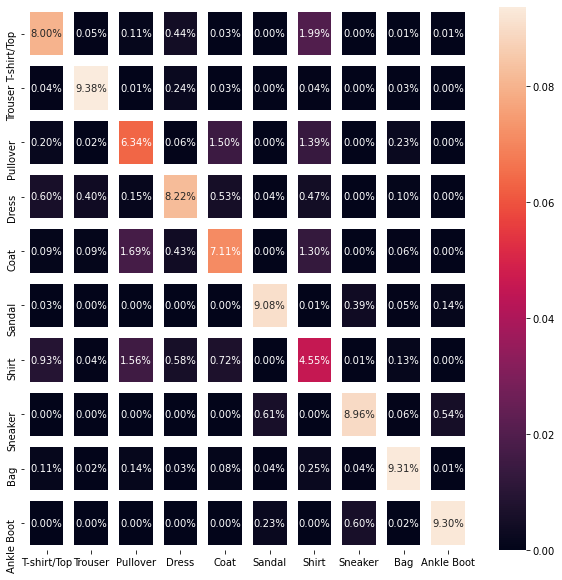

In [164]:
fig, ax = plt.subplots(figsize=(10,10))
cf_matrix = build['confusion_matrix'] / np.sum(build['confusion_matrix'])
if build['dataset']!='mnist':
    idx_to_class = {
                    0: "T-shirt/Top",
                    1: "Trouser",
                    2: "Pullover",
                    3: "Dress",
                    4: "Coat",
                    5: "Sandal",
                    6: "Shirt",
                    7: "Sneaker",
                    8: "Bag",
                    9: "Ankle Boot"
                    }
else:
    idx_to_class = {idx:str(idx) for idx in range(10)}
print(cf_matrix)
hm=sns.heatmap(cf_matrix , annot=True,
                fmt='.2%', linewidths=10, xticklabels=list(idx_to_class.values()), yticklabels=list(idx_to_class.values()), ax=ax)

Text(0.5, 1.0, 'FashionMNIST')

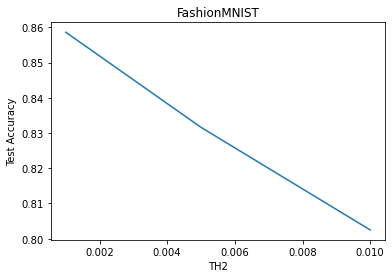

In [166]:
y = [0.8586, 0.8316, 0.8025 ]
x= [0.001, 0.005, 0.01]

plt.plot(x,y)
plt.xlabel('TH2')
plt.ylabel('Test Accuracy')
plt.title('FashionMNIST')

In [148]:
K1=build['model'].par['Layer0'][0].num_kernels
K2=build['model'].par['Layer1'][0].num_kernels
K3=build['model'].par['Layer2'][0].num_kernels
print(K1, K2, K3)
5*5*K1 + K1*5*5*K2 + K2*5*5*K3

10 16 16


10650

In [165]:
K1=build['model'].par['Layer0'][0].num_kernels
K2=build['model'].par['Layer1'][0].num_kernels
K3=build['model'].par['Layer2'][0].num_kernels
print(K1, K2, K3)
(K1+K2+K3)*25

8 11 10


725

In [103]:
build['model'].par['Layer2'][0].Kernels.shape

(9, 25)